# Práctca: Decision Trees - Regression (Clase)

## Santander MetGroup

1. [Ajustando Árboles de Regresión](#1-Ajustando-%C3%81rboles-de-Regresi%C3%B3n:)

 1.1 [Boston data set](#1.1-Boston-data-set:)

 1.2 [Práctica: the Hitters data set](#1.2-Pr%C3%A1ctica:-the-Hitters-data-set:)

## Alumno: Gerardo de Miguel González

## 1. Ajustando Árboles de Regresión:

### 1.1 Boston data set:

En primer lugar, consideraremos el datasetBoston para entrenar un árbol regresión a partir de una submuestra de entrenamiento.

#### Clase

#### Bibiotecas

In [1]:
#::GMG::Bibliotecas que nevesitamos para la práctica
library(MASS)
library(tree)

#### Entrenamiento del modelo

In [2]:
#::GMG::Split replicable original de la práctica ... 
set.seed(1)
indTrain <- sample(1:nrow(Boston), nrow(Boston)/2)

In [3]:
#::GMG::Cálculo del modelo y parámetros devueltos
tree.boston <- tree(medv~., Boston, subset = indTrain)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indTrain)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

Notar que la salida de `summary()` indica que sólo tres de las variables han sido utilizadas para construir el árbol. En el caso de los árboles de regresión la desviación se refiere a la suma de los errores al cuadrado.

In [4]:
#::GMG:: Más cosas que se pueden saber :)
tree.boston

node), split, n, deviance, yval
      * denotes terminal node

 1) root 253 20890.0 22.67  
   2) lstat < 9.715 103  7765.0 30.13  
     4) rm < 7.437 89  3310.0 27.58  
       8) rm < 6.7815 61  1995.0 25.52  
        16) dis < 2.6221 5   615.8 37.40 *
        17) dis > 2.6221 56   610.3 24.46  
          34) rm < 6.4755 31   136.4 22.54 *
          35) rm > 6.4755 25   218.3 26.84 *
       9) rm > 6.7815 28   496.6 32.05 *
     5) rm > 7.437 14   177.8 46.38 *
   3) lstat > 9.715 150  3465.0 17.55  
     6) lstat < 21.49 120  1594.0 19.16  
      12) lstat < 14.48 62   398.5 21.04 *
      13) lstat > 14.48 58   743.3 17.16 *
     7) lstat > 21.49 30   311.9 11.10 *

In [8]:
tree.boston$terms

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat
attr(,"variables")
list(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, 
    ptratio, black, lstat)
attr(,"factors")
        crim zn indus chas nox rm age dis rad tax ptratio black lstat
medv       0  0     0    0   0  0   0   0   0   0       0     0     0
crim       1  0     0    0   0  0   0   0   0   0       0     0     0
zn         0  1     0    0   0  0   0   0   0   0       0     0     0
indus      0  0     1    0   0  0   0   0   0   0       0     0     0
chas       0  0     0    1   0  0   0   0   0   0       0     0     0
nox        0  0     0    0   1  0   0   0   0   0       0     0     0
rm         0  0     0    0   0  1   0   0   0   0       0     0     0
age        0  0     0    0   0  0   1   0   0   0       0     0     0
dis        0  0     0    0   0  0   0   1   0   0       0     0     0
rad        0  0     0    0   0  0   0   0   1   0       0     0     0
tax  

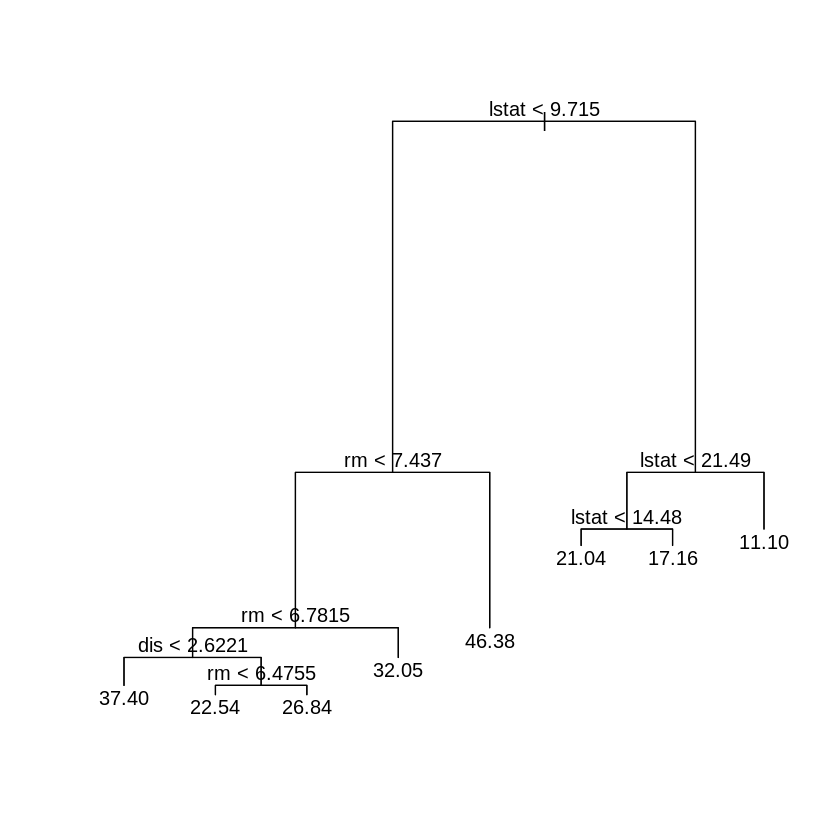

In [10]:
#::GMG::Dibujamos el árbol e interpretamos ...
plot(tree.boston)
text(tree.boston, pretty = 0)

**::GMG::** La variable `lstat` mide el porcentaje de individuos (*proporción* en tanto por cien) con bajo nivel socio-económico en el vecindario/suburbio. El árbol indica que valores bajos de esta variable se corresponden con casas más caras. La variable `rm` mide el núnero *medio* (*average*) de habitaciones por vivienda. El árbol predice un precio *mediano* por casa de $46,380 para casas grandes en suburbios cuyos residentes tienen un alto nivel socio-económico (`rm` > 7.437 y `lstat` < 9.715).

- Kaggle: [Boston Housing Dataset](https://www.kaggle.com/c/boston-housing)

#### Cross-validation for Choosing Tree Complexity

La función [`cv.tree()`](https://www.rdocumentation.org/packages/tree/versions/1.0-39/topics/cv.tree) realiza un entrenamiento con validación cruzada considerando un valor dado de penalización de la complejidad (`K=10` por defecto) para evaluar cuando es necesaria la poda del árbol.

`cv.tree(object, rand, FUN = prune.tree, K = 10, ...)`

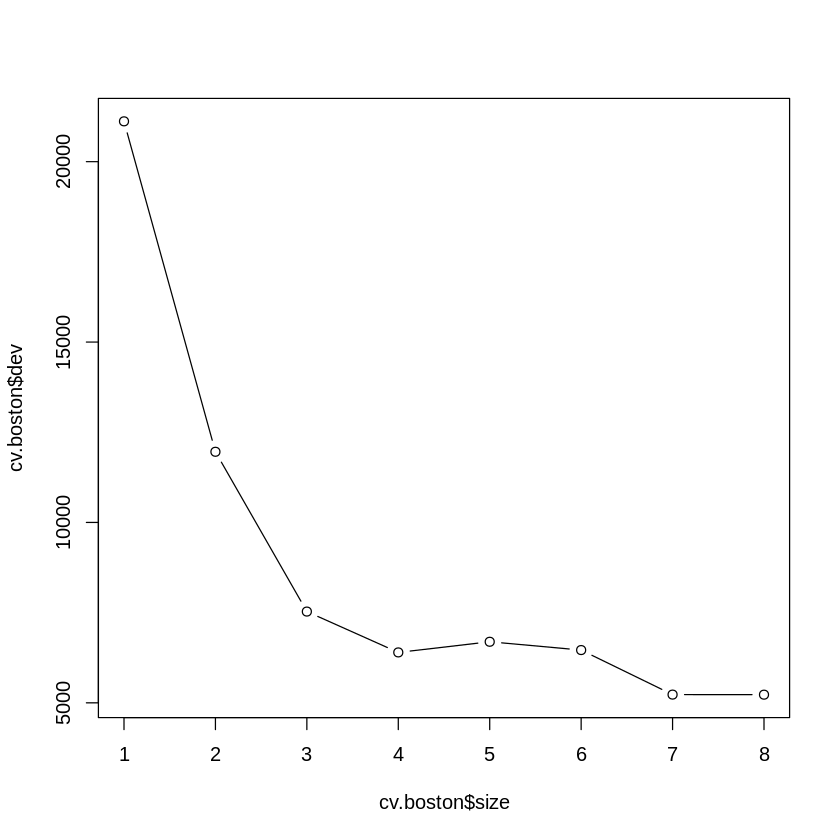

In [11]:
#::GMG:: Como referencia 
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = "b")

In [12]:
#::GMG::Intento ver alguna descripción del resultado
cv.boston

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1]  5226.322  5228.360  6462.626  6692.615  6397.438  7529.846 11958.691
[8] 21118.139

$k
[1]      -Inf  255.6581  451.9272  768.5087  818.8885 1559.1264 4276.5803
[8] 9665.3582

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [13]:
str(cv.boston)

List of 4
 $ size  : int [1:8] 8 7 6 5 4 3 2 1
 $ dev   : num [1:8] 5226 5228 6463 6693 6397 ...
 $ k     : num [1:8] -Inf 256 452 769 819 ...
 $ method: chr "deviance"
 - attr(*, "class")= chr [1:2] "prune" "tree.sequence"


In [14]:
summary(cv.boston)

       Length Class  Mode     
size   8      -none- numeric  
dev    8      -none- numeric  
k      8      -none- numeric  
method 1      -none- character

En este caso, el árbol más complejo es seleccionado por la validación cruzada. 

#### Poda del modelo sin CV

Sin embargo, también podemos usar directamente la función [`prune.tree()`](https://www.rdocumentation.org/packages/tree/versions/1.0-39/topics/prune.tree):

`prune.tree(tree, k = NULL, best = NULL, newdata, nwts,
           method = c("deviance", "misclass"), loss, eps = 1e-3)`
           
**::DUDAS::** ¿Para seleccionar uno en concreto de los podados?

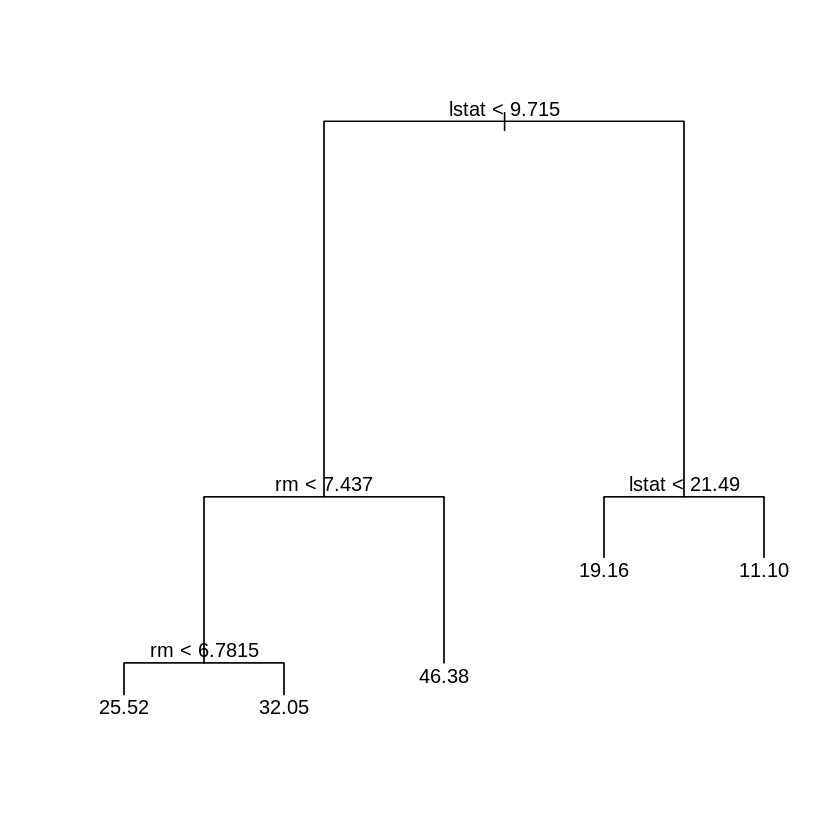

In [16]:
prune.boston <- prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

**::GMG::** La interpretación que hicimos de los precios medianos (*medv*) que hicimos en el árbol inicial sin podar siguen siendo válidas.

#### Predicción con modelo sin podar

Consideremos el árbol sin podar para hacer predicciones sobre el conjunto de test y evaluemos el error:

In [ ]:
yhat <- predict(tree.boston, newdata = Boston[-indTrain,])
boston.test <- Boston[-indTrain, "medv"]
plot(yhat, boston.test)
abline(0,1)

In [ ]:
#::GMG::Aquí se calcula el MSE
sqrt(mean((yhat-boston.test)^2))

In [ ]:
#::GMG::Para aclararme ...
summary(boston.test)

In [ ]:
summary(yhat)

Mientras que en el conjunto de train tenemos:

In [ ]:
yhat <- predict(tree.boston, newdata = Boston[indTrain,])
boston.test <- Boston[indTrain, "medv"]
plot(yhat, boston.test)
abline(0,1)

In [ ]:
#::GMG::Aquí se calcula el MSE
sqrt(mean((yhat-boston.test)^2))

In [ ]:
summary(yhat)

In [ ]:
summary(boston.test)

Es decir, mientras que en el conjunto de test tenemos un error de 5.005 aproximadamante para el conjunto de train tenemos un error de 3.5. 

#### Trabajo personal

**::Ejercicio::**: Revisad la función `tree.control` y forzar el árbol para que sea el más profundo posible, ¿cómo cambian los errores de test y de train?

#### Mi repaso al ejercicio de clase ...

**::GMG::** Referencias

- Kaggle: [The Boston Housing Dataset](https://www.kaggle.com/c/boston-housing)
- R Documentation [Tree Package](https://www.rdocumentation.org/packages/tree/versions/1.0-39) - [`tree()`](https://www.rdocumentation.org/packages/tree/versions/1.0-39/topics/tree)
- CRAN R [Tree package](https://cran.r-project.org/web/packages/tree/index.html) - ([pdf](https://cran.r-project.org/web/packages/tree/tree.pdf))
- [A Brief Tour of the Trees and Forests](https://www.r-bloggers.com/a-brief-tour-of-the-trees-and-forests/). April 29, 2013. By Wesley 
- Quikc R: [Tree-based models](https://www.statmethods.net/advstats/cart.html)
- [Classification & Regression Trees](http://www.di.fc.ul.pt/~jpn/r/tree/tree.html). João Neto. May 2013

In [ ]:
#::GMG::Quizá convenientte echar un vistazo al dataset....
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
str(Boston)

In [ ]:
summary(Boston)

In [ ]:
#::GMG::Una manera canónica de división train/test es 75/25%
#https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function
## 75% of the sample size
smp_size <- floor(0.75 * nrow(Boston))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(Boston)), size = smp_size)

boston_train <- Boston[train_ind, ]
boston_test <- Boston[-train_ind, ]

In [ ]:
#::GMG::Obtención del árbol de regresión ...
tree_boston <- tree(formula = medv ~ ., data = boston_train)
summary(tree_boston)

In [ ]:
plot(tree_boston)
text(tree_boston, pretty = 0)
title(main = 'Árbol de Regresión')

**::GMG::** La variable `lstat` mide el porcentaje de individuos (*proporción* en tanto por cien) con bajo nivel socio-económico en un suburbio/barrio. La variable `rm` mide el núnero *medio* (*average*) de habitaciones por vivienda. La variable `ptratio` el la relación alumnos profesores por ciudad.

El árbol indica que ... ::PENDIENTE::


- Kaggle: [Boston Housing Dataset](https://www.kaggle.com/c/boston-housing)

### 1.2 Práctica: the Hitters data set:

La librería ISLR contiene el dataset Hitters el cual contiene diferentes datos de jugadores de baseball y cuyo objetivo es la predicción del salario de los jugadores en función de diferentes variables explicativas.

En la presente práctica considera en primer lugar el modelo obtenido considerando únicamente como variables explicativas el número de años que el jugador ha participado en las ligas mayores (Years) y el número de bateos de la temporada anterior (Hits).

A continuación extiende el experimento para considerar todas las variables y obtener un árbol final a partir de la poda del árbol inicial. Compara los resultados obtenidos con ambos modelos.

Notar que la base de datos en este caso puede tener valores perdidos (NA).

In [ ]:
library(ISLR)

In [ ]:
attach(Hitters)
# remove NA values
Hitters <- na.omit(Hitters)
Salary <- na.omit(Salary)
# put salary on log scale and fit reg. tree

Del mismo modo, en este caso es preferible trabajar con el logaritmo del salario (log(Salary)) ya que el comportamiento de esta variable transformada es más Gaussiano.

In [ ]:
set.seed(1)
indTrain <- sample(1:nrow(Hitters), nrow(Hitters)/2)
tree.hitters <- tree(log(Salary)~ Years + Hits, Hitters, subset = indTrain)
summary(tree.hitters)

In [ ]:
plot(tree.hitters)
text(tree.hitters,pretty = 0)

In [ ]:
cv.hitters <- cv.tree(tree.hitters)
plot(cv.hitters$size, cv.hitters$dev, type = "b")

In [ ]:
prune.hitters <- prune.tree(tree.hitters, best = 4)
plot(prune.hitters)
text(prune.hitters, pretty = 0)

In [ ]:
detach(Hitters)